In [1]:
# Library 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image
import platform
import warnings
warnings.filterwarnings("ignore")

In [2]:
ds_path = 'E:\\MEGA\\VTCA\\AI_Specialist\\AI_Workspace\\3. Dataset\\'
if platform.system().lower() == 'linux':
    ds_path = '/mnt/e/MEGA/VTCA/AI_Specialist/AI_Workspace/3. Dataset/'

fold_name = 'AI Specialist Lesson 07'

path = ds_path + fold_name
os.chdir(ds_path)

if not os.path.isdir(path):
    import subprocess
    subprocess.run(["unrar", "x", f"{fold_name}.rar"])

os.chdir(path)

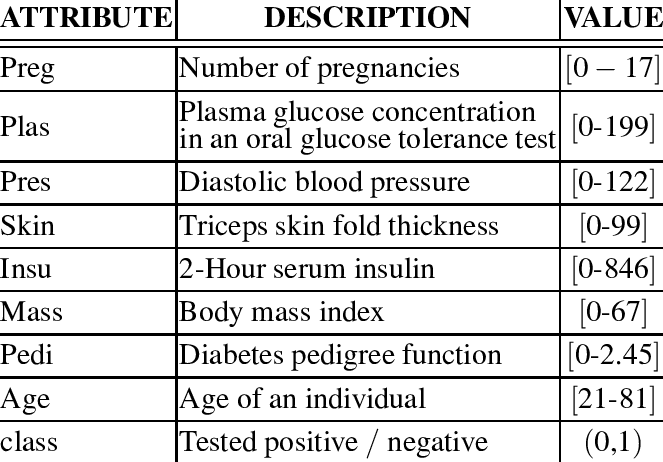

In [3]:
display(Image(filename = 'Dataset Description.png'))

In [4]:
data = pd.read_csv('diabetes.csv')
print(data.shape)
display(data.head())

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data['Pregnancies'].value_counts().sort_index()

0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [16]:
# Zero missing
# Tinh % missing
MissingFeatures = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(data[MissingFeatures] == 0).sum(axis=0) / data.shape[0] * 100

Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64

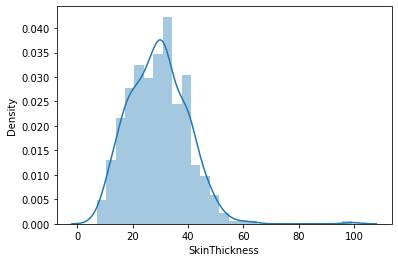

In [17]:
sns.distplot(data[data["SkinThickness"] > 0]["SkinThickness"], kde = True)
plt.show()

In [18]:
# Thay the gia tri 0 SkinThickness theo trung binh SkinThinkness o cac nhom Age

NormalData = data[data["SkinThickness"] > 0]
AbnormalData = data[data["SkinThickness"] == 0]
print(NormalData.shape)
print(AbnormalData.shape)

(541, 9)
(227, 9)


In [38]:
SkinThicknessMap = NormalData[["SkinThickness", "Age"]].groupby("Age").mean("SkinThickness")
SkinThicknessMap

,SkinThickness
Age,
21,23.901961
22,24.583333
23,26.562500
24,29.825000
25,30.263158
26,30.038462
27,29.400000
28,29.535714
29,33.833333


In [39]:
AbnormalData["SkinThickness_Inputed"] = AbnormalData["Age"].map(SkinThicknessMap["SkinThickness"])

In [40]:
AbnormalData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_Inputed
2,8,183,64,0,0,23.3,0.672,32,1,29.100000
5,5,116,74,0,0,25.6,0.201,30,0,28.357143
7,10,115,0,0,0,35.3,0.134,29,0,33.833333
9,8,125,96,0,0,0.0,0.232,54,1,26.500000
10,4,110,92,0,0,37.6,0.191,30,0,28.357143


In [41]:
data.loc[AbnormalData.index, "SkinThickness"] = AbnormalData["SkinThickness_Inputed"]
(data[MissingFeatures] == 0).sum(axis=0) / data.shape[0] * 100

Glucose           0.651042
BloodPressure     4.557292
SkinThickness     0.000000
Insulin          48.697917
BMI               1.432292
dtype: float64

In [43]:
data.drop("Insulin", axis = 1, inplace=True)

In [47]:
# Insulin missing > 48% -> drop
data[['Glucose', 'BloodPressure', 'BMI']] = data[['Glucose', 'BloodPressure', 'BMI']].replace(0, np.NaN)
data.fillna(data.mean(), inplace=True)

In [48]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.360271,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,9.125891,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,24.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.400000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,34.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

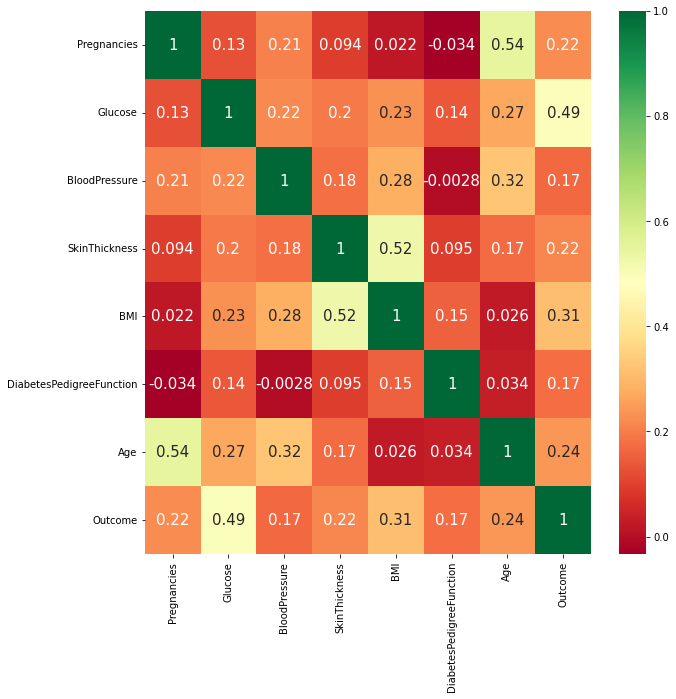

In [49]:
# For dataframe 1 with assumed missing values:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [54]:
EvaluationData = pd.DataFrame(data.corr()["Outcome"][:-1].sort_values(ascending=False))
EvaluationData

,Outcome
Glucose,0.492928
BMI,0.311924
Age,0.238356
Pregnancies,0.221898
SkinThickness,0.215965
DiabetesPedigreeFunction,0.173844
BloodPressure,0.166074


In [55]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.25, random_state=1, stratify=data["Outcome"])

In [56]:
train_X=train[train.columns[:-1]]
test_X=test[test.columns[:-1]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [57]:
# Random Forest Classier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(train_X,train_Y)
pred_Y = model.predict(test_X)

# Results
print('The accuracy Score is:\n',metrics.accuracy_score(pred_Y,test_Y))

The accuracy Score is:
 0.75


In [58]:
model.feature_importances_

array([0.08570733, 0.28070841, 0.08745681, 0.0978565 , 0.16399087,
       0.14065628, 0.1436238 ])

In [59]:
pd.Series(model.feature_importances_,index= train_X.columns).sort_values(ascending=False)

Glucose                     0.280708
BMI                         0.163991
Age                         0.143624
DiabetesPedigreeFunction    0.140656
SkinThickness               0.097856
BloodPressure               0.087457
Pregnancies                 0.085707
dtype: float64